In [45]:
import os

%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt


import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")


In [46]:
#import data
name = 'yellow_tripdata_2015-06.csv'
df = pd.read_csv(name)
%time

KeyboardInterrupt: 

In [ ]:
#clean column names
df.rename(columns={
        'tpep_pickup_datetime' : 'pickup_datetime',
        'tpep_dropoff_datetime' : 'dropoff_datetime'
    }, inplace=True)

""""
        'trip_distance' : 'trip_distance (miles)',
        'fare_amount' : 'fare_amount ($USD)',
        'tip_amount' : 'tip_amount ($USD)',
        'tolls_amount' : 'tolls_amount ($USD)',
        'total_amount' : 'total_amount ($USD)'
"""

In [37]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0,0.5,0.00,0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0,0.5,1.00,0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0,0.5,2.20,0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0,0.5,2.86,0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0,0.5,0.00,0,0.3,10.30


In [38]:
df.shape

(12324935, 19)

In [ ]:
#convert pickup and dropoff to date objects
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
#calculate trip length
df['trip_time_hours'] = df['dropoff_datetime'] - df['pickup_datetime']
df['trip_time_seconds'] = df['trip_time_hours'].map(lambda x:x.astype('timedelta64[s]'))

In [ ]:
#calculate average speed
df['avg_speed'] = df['trip_distance']/(df['trip_time']/np.timedelta64(1,'h'))
df.head()

KeyboardInterrupt: 

/Users/kristenfaulkner/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/Users/kristenfaulkner/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


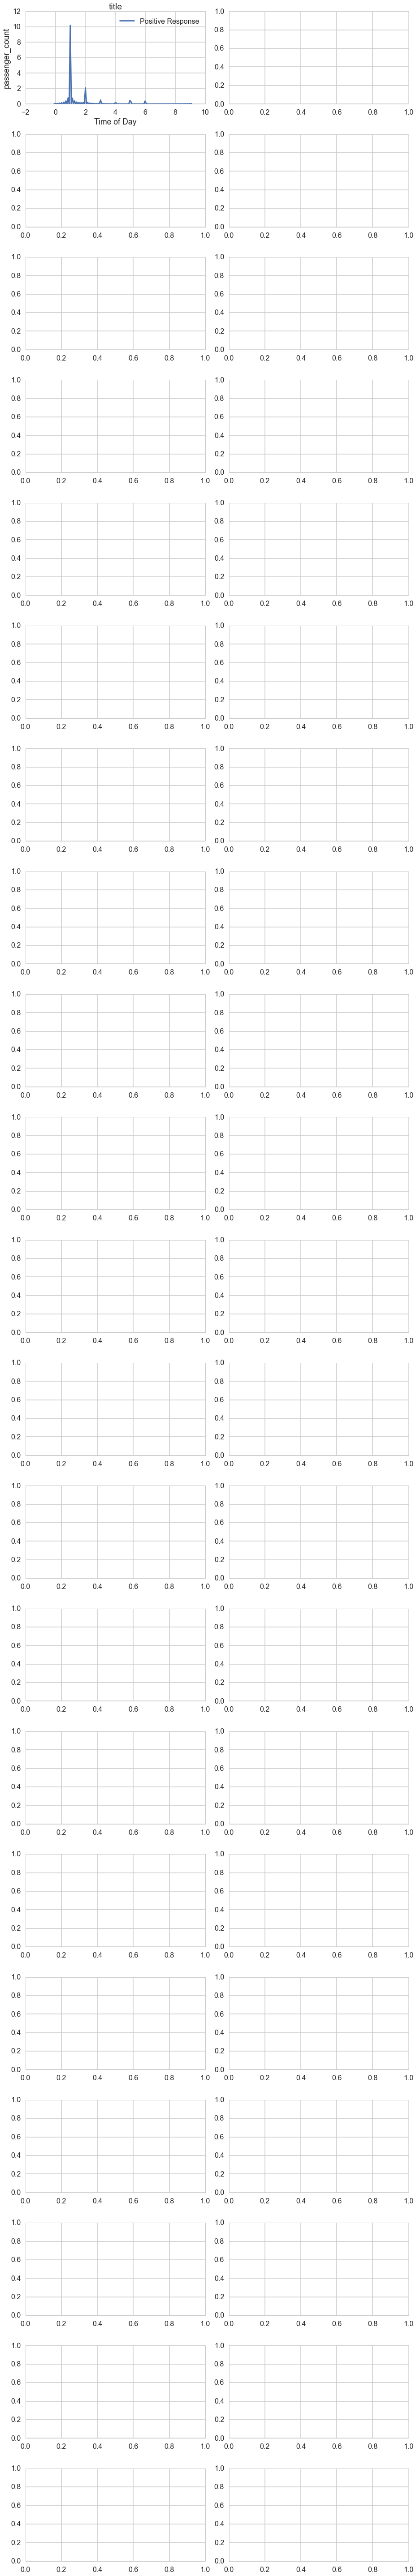

In [44]:
#plot time of day against different variables
plot_vars = ['passenger_count', 'trip_distance', 'payment_type', 'fare_amount', 'tip_amount', 'total_amount', 'trip_time_seconds', 'avg_speed']
#create a 4x6 grid of plots.
fig, axes = plt.subplots(nrows=21, ncols=2, figsize=(13,80), tight_layout=True)
plt.tight_layout(pad=5, w_pad=5, h_pad=5)
plt.subplots_adjust(hspace=.3)

i = 0
#make a subplot for each variable
for axis, col in zip(axes.ravel(), plot_vars):
    var_resp = df[col]
    sns.regplot(var_resp, scatter=True, fit_reg=True, ax=axis, shade=True, label="Positive Response")
    axis.set_title("title")
    axis.set_xlabel("Time of Day")
    axis.set_ylabel(col)
    i = i+1

In [ ]:
df['trip_time'] = delta

delta_seconds = delta.map(lambda x:x.astype('timedelta64[s]'))
df.head()